In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# 1. Integration metrics

This measures how nodes tend to be **interconnected** with each other.

## 1.1 Distance, path, and shortest path

- **Distance** : It is the **number of edges** required to traverse to the **target** node from the **source** node.
- **Path** : It is the **set of edges** connecting source node $\mathcal{i}$ to target node $\mathcal{j}$.
- **Shortest Path**: It is the **lowest** number of edges traversed to get to **target node** $\mathcal{j}$ from **source node** $\mathcal{i}$ amongst all the other possible paths.
- **Diameter** : It is **number of edges** contained in the **longest shortest path** among all possible **shortest paths**.

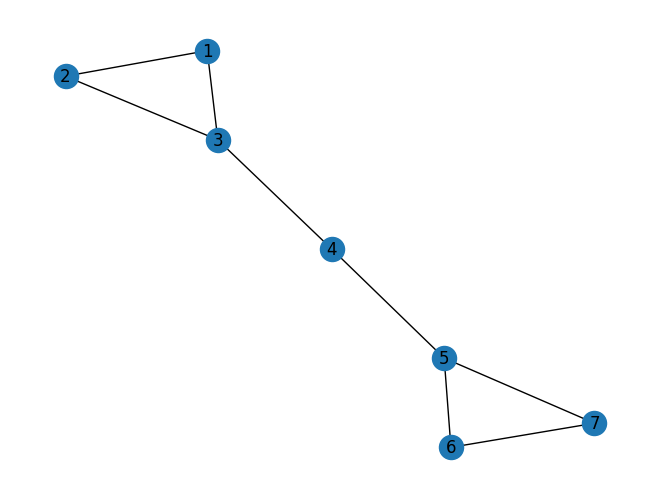

In [2]:
G = nx.Graph()

nodes = {1: "Dublin", 2: "Paris", 3:"Milan", 4:"Rome", 5:"Naples", 6:"Moscow", 7:"Tokyo"}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 5)])

nx.draw(G, with_labels=True)

In [3]:
shortest_path = nx.shortest_path(G, source=1, target=7)
print(f"Shortest path from Node 1 to Node 7: {shortest_path}")

Shortest path from Node 1 to Node 7: [1, 3, 4, 5, 7]


In [7]:
print(f"Diameter of the Graph: {nx.diameter(G)}")

Diameter of the Graph: 4


## 1.2 Characteristic Path length

It is defined as the **average** of **all the shortest path lengths** between all possible pair of nodes. Mathematically, it is expressed as:

$$
\begin{equation}
\frac{1}{q(q-1)} \sum_{i \in V} l_i
\end{equation}
$$

where 
- $V$ represents the set of nodes,
- $q = |V|$ represents the order,
- $l_i$ represents the average path length between node $i$ and all the other nodes.

In [8]:
print(f"Characteristic path length of graph G: {nx.average_shortest_path_length(G)}")

Characteristic path length of graph G: 2.1904761904761907


  Networks having **shorter** characteristic path lengths promote **quicker** transfer of information and reduces cost. 
 
  However, the **downside** of this metric is that **it cannot be always defined** since it is not possible 
  to compute a path among all the nodes in a **disconnected graph**. For this reason, **network efficiency** is also widely used.

## 1.3 Global and local efficiency


- **Global efficiency** : It is **average** of the **inverse** shortest path lengths for all pairs of nodes. Mathematically it is represented as
    $$
      \begin{equation}
      \frac{1}{q(q-1)}\sum_{i \in V} \frac{1}{l_{ij}}
      \end{equation}
    $$
  Such a metric can be seen as a **measure** of how **efficiently** information is exchanged.
  
- **Local efficiency** : It can be computed by considering **only the neighborhood** of the node in the calculation, **without** the node itself.

Efficiency is at **maximum** when a graph is **fully-connected**, while it is **minimal** for **completely disconnected** graph.

In [9]:
print(f"Global efficiency of graph G: {nx.global_efficiency(G)}")
print(f"Local efficiency of graph G: {nx.local_efficiency(G)}")

Global efficiency of graph G: 0.611111111111111
Local efficiency of graph G: 0.6666666666666667


# 2. Segregation metrics

It is used to **quantify** the presence of **groups** of interconnected nodes, known as **communities or modules**, within a network.

## 2.1 Clustering coefficient

- It is a measure of how much nodes cluster together.
- Defined as the **fraction of triangles** (complete subgraph of three nodes and three edges) around a node.
- Is equivalent to the fraction of the node's **neighbors** that are neighbors of each other.

In [11]:
global_clustering = nx.average_clustering(G)
local_clustering = nx.clustering(G)

print(f"Global clustering value: {global_clustering: .3f}")
print(f"Local clustering: {local_clustering}")

Global clustering value:  0.667
Local clustering: {1: 1.0, 2: 1.0, 3: 0.3333333333333333, 4: 0, 5: 0.3333333333333333, 6: 1.0, 7: 1.0}


## 2.2 Transitivity

It is the ratio between **observed** number of **closed triplets** (complete subgraphs with three nodes and two edges), and the **maximum** number of **closed triplets** in the graph.

In [13]:
print(f"Transitivity of Graph G: {nx.transitivity(G) :.3f}")

Transitivity of Graph G: 0.545


## 2.3 Modularity

- Originally designed to **quantify** the division of a network in **aggregated** sets of **highly interconnected** nodes, commonly known as **modules**, **communities**, **groups**, or **cluster**.
- The main idea is that networks having **high modularity** will show **dense connection within the module** and **sparse connection between modules**.
- Unlike other graph metrics, modularity is often computed by means of **optimization algorithms**.

In [17]:
print(f"Modularity of Graph G: {nx.algorithms.community.modularity(G, communities=[{1, 2, 3}, {4, 5, 6, 7}])}")

Modularity of Graph G: 0.3671875


While Segregation metrics helps us to understand the presence of groups. However, each node is a graph has its own importance, and to understand that we need to rely on **centrality metrics**.

# 3. Centrality Metrics

## 3.1 Degree of centrality

- Directly connected with the **degree of a node**.
- Measures the **number of incident edges** on a certain node $\mathcal{i}$. Which means, **more** a node is **connected** the **higher** is it's **degree of centrality**.
- For **directed graphs** we need to consider the **in-degree** and **out-degree** centrality metrics.

In [20]:
print(f"The degree of centrality of each node of graph G: { {nodes[k]:v for k, v in nx.degree_centrality(G).items()} }")

The degree of centrality of each node of graph G: {'Dublin': 0.3333333333333333, 'Paris': 0.3333333333333333, 'Milan': 0.5, 'Rome': 0.3333333333333333, 'Naples': 0.5, 'Moscow': 0.3333333333333333, 'Tokyo': 0.3333333333333333}


## 3.2 Closeness centrality

- Quantifies how much a node is **close (well connected)** to **other nodes**.
- More formally, it refers to the **average distance** of a node $\mathcal{i}$ to all other nodes in the network.
- If $l_{ij}$ is the **shortest path** between node $\mathcal{i}$ and node $\mathcal{j}$, the closeness centrality is defined as:
  $$
  \begin{equation}
  \frac{1}{\sum_{i \in V, i \neq j} l_{ij}}
  \end{equation}
  $$
  where $V$ is the set of nodes in the graph.

In [21]:
print(f"Closeness Centrality: { {nodes[k]:v for k,v in nx.closeness_centrality(G).items()} }")

Closeness Centrality: {'Dublin': 0.4, 'Paris': 0.4, 'Milan': 0.5454545454545454, 'Rome': 0.6, 'Naples': 0.5454545454545454, 'Moscow': 0.4, 'Tokyo': 0.4}


## 3.3 Betweeness Centrality

- Evaluates how much a node acts as a **bridge** between other nodes.
- If $L_{wj}$ is the total number of shortest paths between node $w$ and node $j$, and $L_{wj}(i)$ is the total number of shortest paths between node $w$ and node $j$ passing through node $i$, then the betweeness centrality can be defined as:
  $$
  \begin{equation}
  \sum_{w \neq i \neq j} \frac{L_{wj}(i)}{L_{wj}}
  \end{equation}
  $$

- As per the formula, the higher the value of the numerator, the higher is the betweeness centrality. In other words, the more the number of shortest paths passing through a node $i$, the more is its betweeness centrality.

In [22]:
print(f"Betweeness Centrality: { {nodes[k]:v for k,v in nx.betweenness_centrality(G).items()} }")

Betweeness Centrality: {'Dublin': 0.0, 'Paris': 0.0, 'Milan': 0.5333333333333333, 'Rome': 0.6, 'Naples': 0.5333333333333333, 'Moscow': 0.0, 'Tokyo': 0.0}


While Centrality metrics helps us to understand the importance of each node in a graph. To measure the vulnerability of a network, we need to rely on the resilience metrics.

# 4. Resilience metrics

## 4.1 Assortativity coefficient

- **Assortativity** is used to quantify the **tendency of nodes** being **connected** to **similar nodes**.
- One of the most common ways to measure is the **Pearson correlation coefficient** between the degrees of directly connected nodes (nodes on two opposite ends of a link).
  * It assumes a **positive** value when there is a correlation between nodes of **similar degree**.
  * It assumes a **negative** value when there is a correlation between nodes of **different degree**.

In [24]:
print(f"Assortavitiy coefficient of network G : {nx.degree_pearson_correlation_coefficient(G)}")

Assortavitiy coefficient of network G : -0.6


# Extras

## Clique

- A **clique** is a **fully connected sub-graph** of $n$ nodes within a **larger** graph. It is an **undirected graph**.
- The examples where you can see a clique are **lollipop graph** and **barbell graph**.

## Lollipop Graph
- Formed a clique of size $n$ and a branch of $m$ nodes.

## Barbell Graph
- Formed by **two** cliques of size $m1$ and $m2$ joined by a branch of nodes.

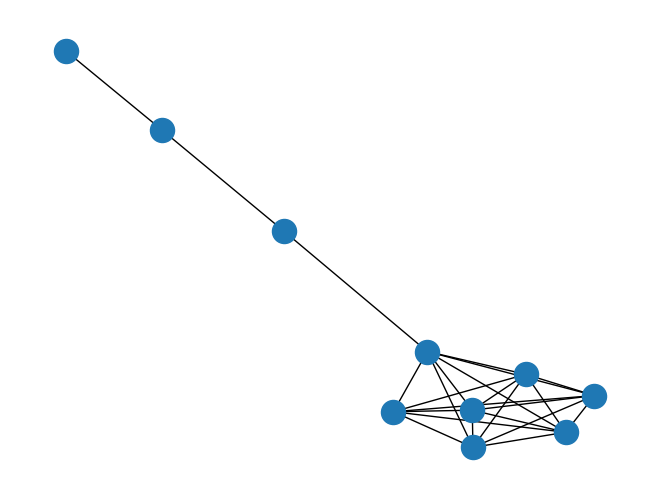

In [25]:
lollipop = nx.lollipop_graph(m=7, n=3)
nx.draw(lollipop)

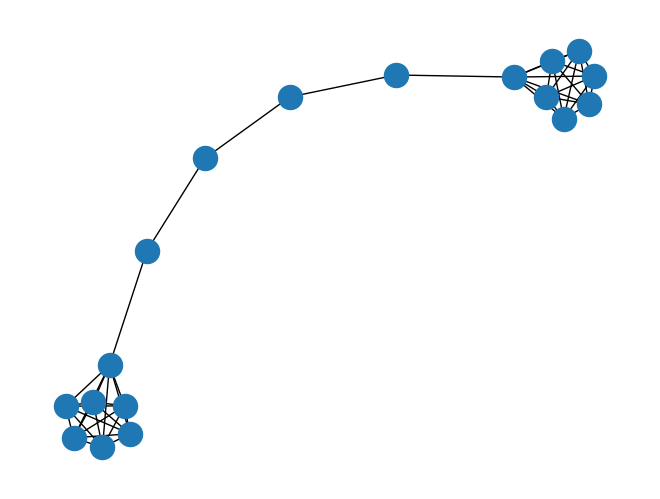

In [26]:
barbell = nx.barbell_graph(m1=7, m2=4)
nx.draw(barbell)